In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

train = pd.read_csv(r"C:\Users\minif\Downloads\Machine Learning Projects\TitanicTrain.csv")
test = pd.read_csv(r"C:\Users\minif\Downloads\Machine Learning Projects\TitanicTest.csv")

In [34]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
train.loc[train['Survived'] == 1]
null_rows = train.isna().sum()
null_rows

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

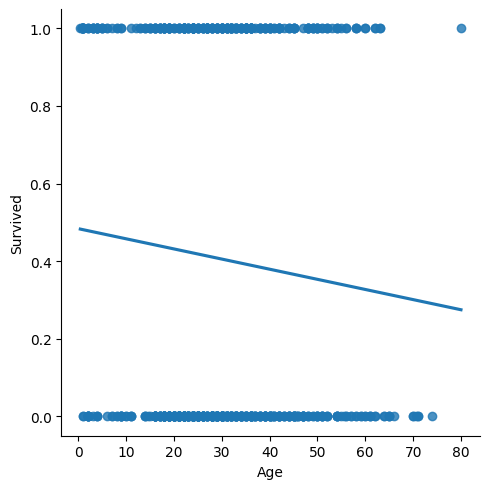

In [36]:
sns.lmplot(x="Age", y="Survived", data=train, fit_reg=True, ci=None)
train.columns

<Axes: xlabel='Sex', ylabel='Survived'>

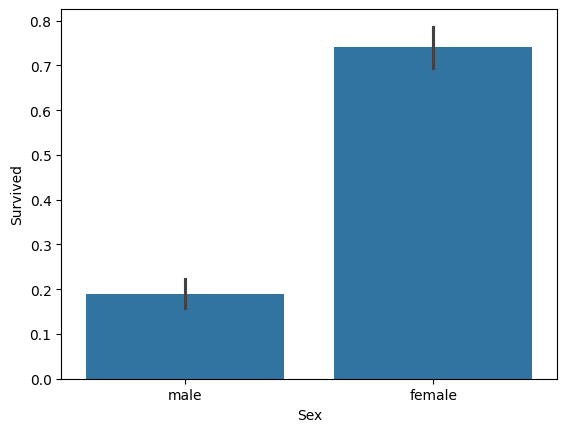

In [37]:
sns.barplot(x="Sex", y="Survived", data=train)

<Axes: xlabel='Pclass', ylabel='Survived'>

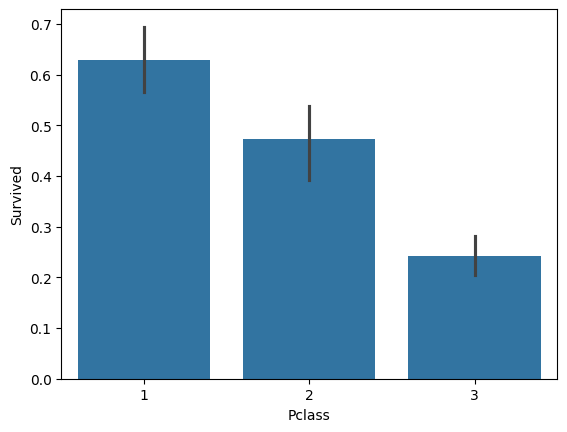

In [38]:
sns.barplot(x="Pclass", y="Survived", data=train)

<Axes: xlabel='SibSp', ylabel='Survived'>

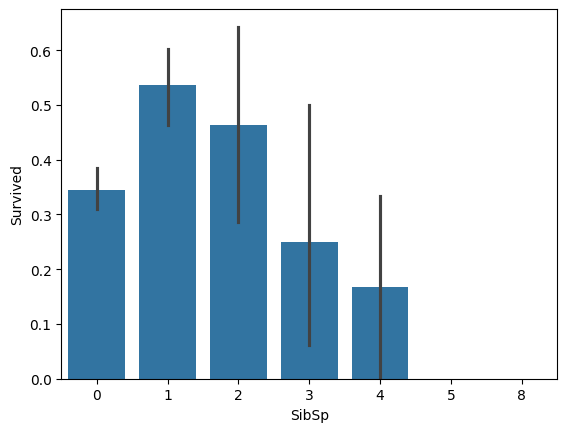

In [39]:
sns.barplot(x="SibSp", y="Survived", data=train)

<Axes: xlabel='Parch', ylabel='Survived'>

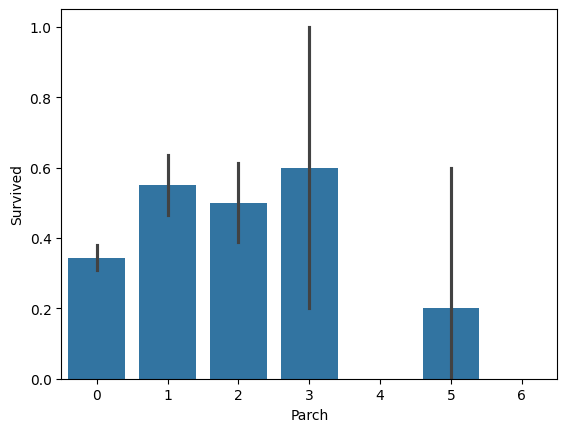

In [40]:
sns.barplot(x="Parch", y="Survived", data=train)

In [41]:
train['CabinBool'] = (train['Cabin'].notnull().astype('int'))
test['CabinBool'] = (test['Cabin'].notnull().astype('int'))
train = train.drop(columns=['Ticket'])
train = train.drop(columns=['Cabin'])
test = test.drop(columns=['Ticket'])
test = test.drop(columns=['Cabin'])
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1


In [42]:
S = train[train["Embarked"] == "S"].shape[0]
C = train[train["Embarked"] == 'C'].shape[0]
Q = train[train['Embarked'] == 'Q'].shape[0]
print("Number of people embarking in Southampton (S):", S)
print("Number of people embarking in Cherbourg (C):", C)
print("Number of people embarking in Queenstown (Q):", Q)

Number of people embarking in Southampton (S): 644
Number of people embarking in Cherbourg (C): 168
Number of people embarking in Queenstown (Q): 77


In [43]:
train["Embarked"] = train["Embarked"].fillna('S')
test["Embarked"] = test["Embarked"].fillna('S')

In [44]:
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract((' ([A-Za-z]+)\.'))

pd.crosstab(train['Title'], train['Sex'])

<>:4: SyntaxWarning: invalid escape sequence '\.'
<>:4: SyntaxWarning: invalid escape sequence '\.'
C:\Users\minif\AppData\Local\Temp\ipykernel_22264\2709758784.py:4: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract((' ([A-Za-z]+)\.'))


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [45]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [46]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1


<Axes: xlabel='Age', ylabel='Count'>

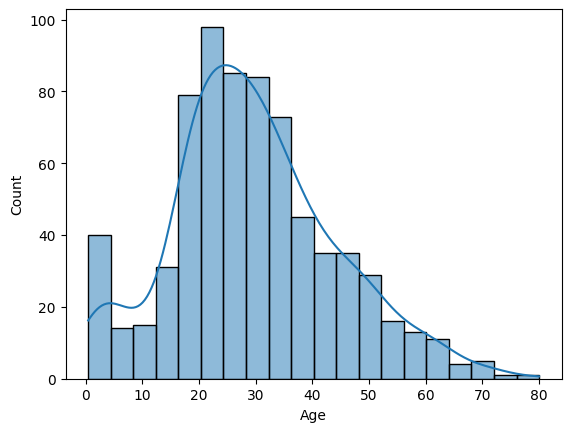

In [47]:
sns.histplot(train['Age'], kde=True)

In [48]:
age_impute = train.groupby(['Title', 'Pclass'])['Age'].median()
age_impute2 = test.groupby(['Title', 'Pclass'])['Age'].median()
age_impute

Title  Pclass
1      1         40.0
       2         31.0
       3         26.0
2      1         30.0
       2         24.0
       3         18.0
3      1         40.0
       2         32.0
       3         31.0
4      1          4.0
       2          1.0
       3          4.0
5      1         41.0
6      1         48.5
       2         46.5
Name: Age, dtype: float64

In [49]:
train['Age'] = train.apply(
    lambda row: age_impute.loc[row['Title'], row['Pclass']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,6
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,23.4500,S,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1


In [50]:
test['Age'] = test.apply(
    lambda row: age_impute2.loc[row['Title'], row['Pclass']] if pd.isnull(row['Age']) else row['Age'],
    axis=1
)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,3
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,25.0,0,0,8.0500,S,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,1,6
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,0,1
416,1308,3,"Ware, Mr. Frederick",male,25.0,0,0,8.0500,S,0,1


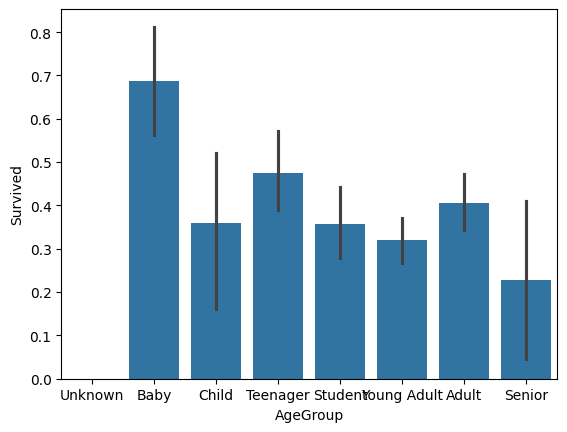

In [51]:
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#Draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [52]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,6,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,2,Student
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,23.4500,S,0,2,Teenager
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Young Adult


In [53]:
title_mapping = {"Baby": 1, "Child": 2, "Teenager": 3, "Student": 4, "Young Adult": 5, "Adult": 6, "Senior": 7}

train["AgeGroup"] = train["AgeGroup"].map(title_mapping)
test["AgeGroup"] = test["AgeGroup"].map(title_mapping)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3,6.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3,5.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,0,6,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,2,4.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,23.4500,S,0,2,3.0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,5.0


In [54]:
sex_mapping = {"male": 0, "female": 1}

train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0,1,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,3,6.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,0,2,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1,3,5.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,0,6,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,1,2,4.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.0,1,2,23.4500,S,0,2,3.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1,1,5.0


In [55]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}

train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool,Title,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0,1,4.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,2,1,3,6.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0,2,5.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,1,3,5.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,1,0,6,5.0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,1,1,2,4.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.0,1,2,23.4500,1,0,2,3.0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,2,1,1,5.0


In [56]:
train["FareGroup"] = pd.qcut(train["Fare"], 4, labels = [1,2,3,4])
test["FareGroup"] = pd.qcut(train["Fare"], 4, labels = [1,2,3,4])

train = train.drop(["Fare"], axis=1)
test = test.drop(["Fare"], axis=1)

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Embarked,CabinBool,Title,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1,0,1,4.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,2,1,3,6.0,4
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,1,0,2,5.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,1,3,5.0,4
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,1,0,1,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,1,0,6,5.0,2
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,1,1,2,4.0,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.0,1,2,1,0,2,3.0,3
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,2,1,1,5.0,3


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

predictors = train.drop(['Survived', 'PassengerId', 'Name'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.2, random_state = 42)

In [71]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

80.45


C:\Users\minif\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [74]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

83.8


In [76]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

81.56
